# Metodo di Bisezione
In questo Notebbok impariamo a risolvere in modo approssimato qualsiasi equazione del tipo

$$f(x) = 0 $$

Per farlo usiamo il linguaggio Python.

### Definizione di una funzione numerica

La seguente cella definisce la funzione

$$f(x) = \frac{\sin(x)}{x}$$

Per poter usare la funzione $\sin(x)$, dobbiamo includere il modulo di funzioni mathematiche di Python.

In [2]:
import math
f = lambda x: math.sin(x)/x

print(f(1), f(2), f(3), f(4))

0.8414709848078965 0.45464871341284085 0.0470400026866224 -0.18920062382698205


Possiamo rappresentare il grafico della funzione, importando i moduli opportuni.

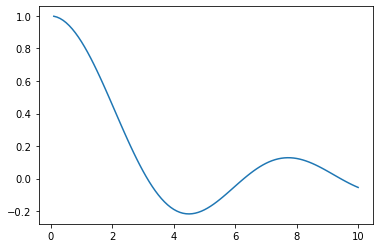

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x_vec = np.linspace(0.1, 10, 100)
y_vec = list(map(f, x_vec))
plt.plot(x_vec, y_vec)

### L'idea alla base del metodo di bisezione

Dai calcoli precedenti è emerso che $f(3) \approx 0.047 > 0$ e $f(4) \approx -0.19 < 0$. Deve quindi esistere uno zero $\bar{x}$ della funzione tale che

$$f(\bar{x}) = 0$$
e
$$ 3 < \bar{x} < 4$$

Diamo un nome agli estremi del nostro intervallo e consideriamo il punto medio:

In [4]:
x_min = 3
x_max = 4
x_med = (x_min + x_max)/2

print(f(x_med))

-0.10022377933989138


La funzione calcolata nel punto medio del nostro intervallo ha valore negativo, quindi lo zero è nella metà sinistra dell'intervallo.

$$x_{min} < \bar{x} < x_{med}$$
$$ 3 < \bar{x} < 3.5$$

Quindi, possiamo restringere l'intervallo che contiene $\bar{x}$ ponendo $x_{max} = x_{med}$.

Visualizziamo graficamente questi valori:



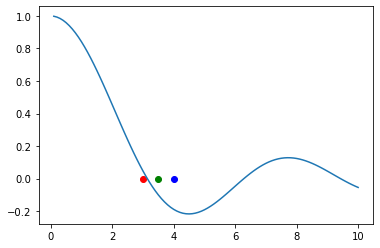

In [5]:
plt.plot(x_vec, y_vec)
plt.scatter(x_min, 0, color = "r")
plt.scatter(x_max, 0, color = "b")
plt.scatter(x_med,0, color = "g")

Restringiamo il nostro intervallo iterando queste operazioni:

In [ ]:
x_max = x_med
x_med = (x_min + x_max)/2
print(x_med)

print(f(x_med))

Quindi, nuovamente, lo zero è nella metà sinistra dell'intervallo

$$ 3 < \bar{x} < 3.125$$

e $x_{min} = 3$, $x_{max} = 3.125$.
#### Esercizio 1
Rappresenta graficamente la funzione e l'intervallo corrente che contiene lo zero della funzione ([x_min, x_max]).
#### Esercizio 2
Restringi ulteriormente l'intervallo, ripetendo le operazioni precedenti

## Selezione dell'intervallo con struttura if-else
Possiamo usare il costrutto condizionale if-else per restringere l'intervallo automaticamente:

In [9]:
x_med = (x_min + x_max)/2

if f(x_min)*f(x_med) < 0: 
    # in questo caso, f(x_min) e f(x_med) sono discordi, quindi lo zero è nella metà sinistra dell'intervallo
    x_max = x_med
else:
    # altrimenti lo zero è nella metà destra dell'intervallo
    x_min = x_med
print(x_min, f(x_min))
print(x_max, f(x_max))

3.125 0.005309405513391329
3.1875 -0.014397246516950494


Prova a eseguire ripetutamente la cella precedente per restringere l'intervallo con la soluzione

## Iterazione del processo con ciclo while
Possiamo automatizzare completamente il processo di bisezione usando un ciclo while. Per farlo, fissiamo la precisione con cui vogliamo conoscere lo zero della funzione $\bar{x}$, cioè l'estensione massima dell'intervallo che contiene $\bar{x}$.
Nella seguente cella, ripartiamo dall'inizio, fissando nuovamente $x_{min} = 3$ e x_max = 4.

In [ ]:
x_min = 3
x_max = 4

# estensione massima dell'intervallo
delta = 0.01

while x_max - x_min > delta:
    x_med = (x_max + x_min)/2
    
    
    print(x_min, x_med, x_max)
    
    if f(x_min)*f(x_med) < 0: 
        # in questo caso, f(x_min) e f(x_med) sono discordi, quindi lo zero è nella metà sinistra dell'intervallo
        x_max = x_med
    else:
        # altrimenti lo zero è nella metà destra dell'intervallo
        x_min = x_med


Il seguente codice rappresenta graficamente il processo di restrizione dell'intervallo

In [ ]:
x_min = 3
x_max = 4

x_vec = np.linspace(x_min, x_max, 100)
y_vec = list(map(f, x_vec))

# estensione massima dell'intervallo
delta = 0.01

while x_max - x_min > delta:
    x_med = (x_max + x_min)/2
    
    
    print(x_min, x_med, x_max)
    plt.plot(x_vec, y_vec)
    plt.scatter([x_min, x_med, x_max],[0,0,0])
    plt.pause(1)
    
    if f(x_min)*f(x_med) < 0: 
        # in questo caso, f(x_min) e f(x_med) sono discordi, quindi lo zero è nella metà sinistra dell'intervallo
        x_max = x_med
    else:
        # altrimenti lo zero è nella metà destra dell'intervallo
        x_min = x_med